In [1]:
import sys
import os
from tempfile import mkdtemp
sys.path.insert(0, '..')

import numpy as np
from process_bigraph import Composite, pp
from process_bigraph.experiments.parameter_scan import RunProcess

from biosimulator_processes import CORE 


Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator']


1. Define inputs

In [2]:
omex_dir = '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'
sbml_fp = os.path.join(omex_dir, 'BIOMD0000000012_url.xml')
sedml_fp = os.path.join(omex_dir, 'simulation.sedml')
reports_path = os.path.join(omex_dir, 'reports.h5')
simulators = ['amici', 'copasi', 'tellurium']

2. Define composition document (manuscript?)

In [3]:
manuscript = {
    'amici': {
        '_type': 'step',
        'address': 'local:utc-amici',
        'config': {
            'model': {
                'model_source': omex_fp
            }
        },
        'inputs': {
            'time': ['time_store'],
            'floating_species': ['amici_floating_species_store'],
            'model_parameters': ['amici_model_parameters_store'],
            'reactions': ['amici_reactions_store']
        },
        'outputs': {
            'time': ['time_store'],
            'floating_species': ['amici_floating_species_store']
        }
    },
    'copasi': {
        '_type': 'step',
        'address': 'local:utc-copasi',
        'config': {
            'model': {
                'model_source': omex_fp
            }
        },
        'inputs': {
            'time': ['time_store'],
            'floating_species': ['copasi_floating_species_store'],
            'model_parameters': ['copasi_model_parameters_store'],
            'reactions': ['copasi_reactions_store']
        },
        'outputs': {
            'time': ['time_store'],
            'floating_species': ['copasi_floating_species_store']
        }
    },
    'tellurium': {
        '_type': 'step',
        'address': 'local:utc-tellurium',
        'config': {
            'model': {
                'model_source': omex_fp
            }
        },
        'inputs': {
            'time': ['time_store'],
            'floating_species': ['tellurium_floating_species_store'],
            'model_parameters': ['tellurium_model_parameters_store'],
            'reactions': ['tellurium_reactions_store']
        },
        'outputs': {
            'time': ['time_store'],
            'floating_species': ['tellurium_floating_species_store']
        }
    },
    'comparison': {
        '_type': 'step',
        'address': 'local:utc-comparator',
        'config': {
            'simulators': ['amici', 'copasi', 'tellurium'],
        },
        'inputs': {
            'time': ['time_store'],
            'amici_floating_species': ['amici_floating_species_store'],
            'copasi_floating_species': ['copasi_floating_species_store'],
            'tellurium_floating_species': ['tellurium_floating_species_store'],
        },
        'outputs': {
            'results': ['results_store'],
        }
    },
    'emitter': {
        '_type': 'step',
        'address': 'local:ram-emitter',
        'config': {
            'emit': {
                'results': 'tree[float]',
            }
        },
        'inputs': {
            'results': ['results_store'],
        }
    }
}


output_bridge = {
    'inputs': {
        'results': ['results_store']
    },
    'outputs': {
        'results': ['results_store']
    }
}

3. Create composition with doc specifications

In [4]:
composition_config = {'state': manuscript, 'bridge': output_bridge}
composition = Composite(
    config=composition_config,
    core=CORE
)

2024-06-06 07:59:55.881 - amici.sbml_import - INFO - Finished importing SBML                         (4.59E-02s)
2024-06-06 07:59:55.935 - amici.sbml_import - INFO - Finished processing SBML observables            (5.13E-02s)
2024-06-06 07:59:55.940 - amici.sbml_import - INFO - Finished processing SBML event observables      (6.25E-07s)
2024-06-06 07:59:55.966 - amici.de_model - INFO - Finished computing xdot                            (4.37E-03s)
2024-06-06 07:59:55.974 - amici.de_model - INFO - Finished computing x0                              (2.99E-03s)
2024-06-06 07:59:55.995 - amici.de_model - INFO - Finished computing w                               (1.76E-02s)
2024-06-06 07:59:56.814 - amici.de_export - INFO - Finished generating cpp code                      (8.13E-01s)
2024-06-06 08:00:06.056 - amici.de_export - INFO - Finished compiling cpp code                       (9.24E+00s)


In [5]:
pp(composition.state)

{ 'amici': { '_inputs': { 'floating_species': 'tree[float]',
                          'model_parameters': 'tree[float]',
                          'reactions': 'list[string]',
                          'time': 'list[float]'},
             '_outputs': { 'floating_species': 'tree[float]',
                           'time': 'list[float]'},
             '_type': 'step',
             'address': 'local:utc-amici',
             'config': { 'constant_parameters': None,
                         'method': 'deterministic',
                         'model': { 'model_changes': {},
                                    'model_id': '',
                                    'model_language': 'sbml',
                                    'model_name': 'composite_process_model',
                                    'model_source': '/var/folders/s3/2mt567997bj0_z5_19sd89500000gn/T/tmprb2co4pu/BIOMD0000000012_url.xml',
                                    'model_units': {}},
                         'model_outpu

In [6]:
for simulator in simulators:
    print(f'{simulator}:')
    pp(composition.state[simulator]['instance'].initial_state())
    print('\n')


amici:
{ 'floating_species': { 'PX': 0.0,
                        'PY': 0.0,
                        'PZ': 0.0,
                        'X': 0.0,
                        'Y': 20.0,
                        'Z': 0.0},
  'model_parameters': { 'KM': 40.0,
                        'a0_tr': 0.0,
                        'a_tr': 0.0,
                        'alpha': 216.404,
                        'alpha0': 0.2164,
                        'average mRNA life time': 0.0,
                        'beta': 0.2,
                        'k_tl': 0.0,
                        'kd_mRNA': 0.0,
                        'kd_prot': 0.0,
                        'mRNA half life': 2.0,
                        'n': 2.0,
                        'protein half life': 10.0,
                        'tps_active': 0.5,
                        'tps_repr': 0.0005,
                        'translation efficiency': 20.0},
  'reactions': [ 'degradation of LacI transcripts',
                 'degradation of TetR transcripts',


4. Run composition

In [7]:
composition.bridge

{'inputs': {'results': ['results_store']},
 'outputs': {'results': ['results_store']}}

In [8]:
composition.run(1)

In [9]:
composition_results = composition.gather_results()

In [10]:
composition_results

{('emitter',): []}

In [11]:
composition.state

{'amici': {'_type': 'step',
  'address': 'local:utc-amici',
  'config': {'model': {'model_source': '/var/folders/s3/2mt567997bj0_z5_19sd89500000gn/T/tmprb2co4pu/BIOMD0000000012_url.xml',
    'model_id': '',
    'model_language': 'sbml',
    'model_name': 'composite_process_model',
    'model_changes': {},
    'model_units': {}},
   'time_config': {'duration': None,
    'num_steps': None,
    'step_size': None,
    'output_start_time': None,
    'initial_time': None},
   'species_context': 'concentrations',
   'working_dir': '',
   'method': 'deterministic',
   'model_output_dir': '/var/folders/s3/2mt567997bj0_z5_19sd89500000gn/T/tmpkrup2hq3',
   'observables': None,
   'constant_parameters': None,
   'sigmas': None},
  'inputs': {'time': ['time_store'],
   'floating_species': ['amici_floating_species_store'],
   'model_parameters': ['amici_model_parameters_store'],
   'reactions': ['amici_reactions_store']},
  'outputs': {'time': ['time_store'],
   'floating_species': ['amici_floating_

In [12]:
from biosimulator_processes.execute import exec_utc_comparison

In [13]:
utc_comparison_result = exec_utc_comparison(omex_fp, simulators)
_c = utc_comparison_result.copy()
for spec_name, result in utc_comparison_result['results'].items():
    _c['results'][spec_name].pop('output_data')
pp(_c)

2024-06-06 08:00:06.691 - amici.sbml_import - INFO - Finished loading SBML                           (7.81E-03s)
2024-06-06 08:00:06.737 - amici.sbml_import - INFO - Finished importing SBML                         (4.17E-02s)
2024-06-06 08:00:06.755 - amici.sbml_import - INFO - Finished processing SBML observables            (1.40E-02s)
2024-06-06 08:00:06.759 - amici.sbml_import - INFO - Finished processing SBML event observables      (4.59E-07s)
2024-06-06 08:00:06.783 - amici.de_model - INFO - Finished computing xdot                            (3.61E-03s)
2024-06-06 08:00:06.792 - amici.de_model - INFO - Finished computing x0                              (4.73E-03s)
2024-06-06 08:00:06.805 - amici.de_model - INFO - Finished computing w                               (8.34E-03s)
2024-06-06 08:00:07.472 - amici.de_export - INFO - Finished generating cpp code                      (6.62E-01s)
2024-06-06 08:00:15.408 - amici.de_export - INFO - Finished compiling cpp code                  

{ 'id': 'repressilator-comparison',
  'results': { 'LacI mRNA': { 'mse': { 'amici': { 'amici': 0.0,
                                                  'copasi': 1.0884950422811668,
                                                  'tellurium': 307.2027588807725},
                                       'copasi': { 'amici': 1.0884950422811668,
                                                   'copasi': 0.0,
                                                   'tellurium': 305.76232201739214},
                                       'tellurium': { 'amici': 307.2027588807725,
                                                      'copasi': 305.76232201739214,
                                                      'tellurium': 0.0}},
                              'prox': { 'amici': { 'amici': True,
                                                   'copasi': False,
                                                   'tellurium': False},
                                        'copasi': { 'amici':

In [14]:
utc_comparison_result['id']

'repressilator-comparison'

In [15]:
from biosimulator_processes.api.instance import UtcComparisonDocument
doc = UtcComparisonDocument(model_source=omex_fp)

In [16]:
doc

{'state': {'amici': {'_type': 'step',
   'address': 'local:utc-amici',
   'config': {'model': {'model_source': '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator.omex'}},
   'inputs': {'time': ['time_store'],
    'floating_species': ['amici_floating_species_store'],
    'model_parameters': ['amici_model_parameters_store'],
    'reactions': ['amici_reactions_store']},
   'outputs': {'time': ['time_store'],
    'floating_species': ['amici_floating_species_store']}},
  'copasi': {'_type': 'step',
   'address': 'local:utc-copasi',
   'config': {'model': {'model_source': '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator.omex'}},
   'inputs': {'time': ['time_store'],
    'floating_species': ['copasi_floating_species_store'],
    'model_parameters': ['copasi_model_parameters_store'],
    'reactions': ['copasi_reactions_store']},
   'outputs': {'time': ['time_store'],
    'floating_species': ['copasi_floating_species_store']}},
  'tellurium': {'_type': 'step'

Perform an entire sbml source directory scan with the comparison:

In [17]:
from biosimulator_processes.execute import sbml_utc_comparison_scan

source_dir = '../test_suite/examples/sbml-core'
scan_results = sbml_utc_comparison_scan(source_dir, simulators)

# successfully run
scan_results.keys()

2024-06-06 08:00:15.679 - amici.sbml_import - INFO - Finished loading SBML                           (1.32E-02s)
2024-06-06 08:00:15.991 - amici.sbml_import - INFO - Finished loading SBML                           (9.79E-03s)
2024-06-06 08:00:16.061 - amici.sbml_import - INFO - Finished importing SBML                         (6.61E-02s)
2024-06-06 08:00:16.061 - amici.sbml_import - WARNING - Conservation laws are currently not supported for models with events, piecewise or Heaviside functions, and will be turned off.
2024-06-06 08:00:16.105 - amici.sbml_import - INFO - Finished processing SBML observables            (4.06E-02s)
2024-06-06 08:00:16.109 - amici.sbml_import - INFO - Finished processing SBML event observables      (5.42E-07s)
2024-06-06 08:00:16.144 - amici.de_model - INFO - Finished computing xdot                            (4.57E-03s)
2024-06-06 08:00:16.152 - amici.de_model - INFO - Finished computing x0                              (3.21E-03s)
2024-06-06 08:00:16.169 -

dict_keys(['Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-Fehlberg', 'Szymanska-J-Theor-Biol-2009-HSP-synthesis', 'Szymanska-J-Theor-Biol-2009-HSP-synthesis.omex', 'Tomida-EMBO-J-2003-NFAT-translocation.omex', 'Parmar-BMC-Syst-Biol-2017-iron-distribution.omex', 'Vilar-PNAS-2002-minimal-circardian-clock-discrete-SSA.omex', 'Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-Fehlberg.omex', 'Vilar-PNAS-2002-minimal-circardian-clock-discrete-SSA', 'Vilar-PNAS-2002-minimal-circardian-clock-continuous', 'Edelstein-Biol-Cybern-1996-Nicotinic-excitation.omex', 'Tomida-EMBO-J-2003-NFAT-translocation', 'Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations', 'Edelstein-Biol-Cybern-1996-Nicotinic-excitation', 'Elowitz-Nature-2000-Repressilator.omex', 'Elowitz-Nature-2000-Repressilator', 'Vilar-PNAS-2002-minimal-circardian-clock', 'Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML.omex', 'Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous', 'Ciliberto-J-Cell-Biol-2003-

In [18]:
scan_results['Parmar-BMC-Syst-Biol-2017-iron-distribution.omex']

{'error': 'At least one simulator did not support Parmar-BMC-Syst-Biol-2017-iron-distribution.omex'}

In [19]:
scan_results['Szymanska-J-Theor-Biol-2009-HSP-synthesis.omex']

{'results': {'Hsp70': {'mse': {'copasi': {'copasi': 0.0,
     'amici': 1.8981199784753637e+43,
     'tellurium': 17.609614311071017},
    'amici': {'copasi': 1.8981199784753637e+43,
     'amici': 0.0,
     'tellurium': 1.8981199784753637e+43},
    'tellurium': {'copasi': 17.609614311071017,
     'amici': 1.8981199784753637e+43,
     'tellurium': 0.0}},
   'prox': {'copasi': {'copasi': True, 'amici': False, 'tellurium': False},
    'amici': {'copasi': False, 'amici': True, 'tellurium': False},
    'tellurium': {'copasi': False, 'amici': False, 'tellurium': True}},
   'output_data': {'amici_floating_species': {'Hsp70': array([2.73546   , 2.73227442, 2.72398478, ..., 4.75360269, 4.75325444,
            4.75290689]),
     'HSF': array([0.332019  , 0.33596875, 0.3437789 , ..., 0.45866989, 0.45871426,
            0.45875855]),
     'S': array([3.09000000e-17, 1.75938445e-02, 2.61231852e-02, ...,
            3.27473126e-01, 3.27485913e-01, 3.27498676e-01]),
     'Hsp70_HSF': array([76.4593   

In [20]:
for f in scan_results.keys():
    if not 'error' in scan_results[f].keys():
        print(f)

Szymanska-J-Theor-Biol-2009-HSP-synthesis
Szymanska-J-Theor-Biol-2009-HSP-synthesis.omex
Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations
Elowitz-Nature-2000-Repressilator.omex
Elowitz-Nature-2000-Repressilator
Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML.omex
Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations.omex
Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML


In [21]:
from biosimulator_processes.execute import exec_utc_comparison

varusai_archive = os.path.join(source_dir, 'Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML.omex')
caravagna_utc_comparison = exec_utc_comparison(varusai_archive, simulators)

2024-06-06 08:01:27.640 - amici.sbml_import - INFO - Finished loading SBML                           (1.39E-02s)
2024-06-06 08:01:27.689 - amici.sbml_import - INFO - Finished importing SBML                         (4.56E-02s)
2024-06-06 08:01:27.709 - amici.sbml_import - INFO - Finished processing SBML observables            (1.65E-02s)
2024-06-06 08:01:27.712 - amici.sbml_import - INFO - Finished processing SBML event observables      (4.17E-07s)
2024-06-06 08:01:27.746 - amici.de_model - INFO - Finished computing xdot                            (3.99E-03s)
2024-06-06 08:01:27.754 - amici.de_model - INFO - Finished computing x0                              (3.64E-03s)
2024-06-06 08:01:27.769 - amici.de_model - INFO - Finished computing w                               (1.15E-02s)
2024-06-06 08:01:28.426 - amici.de_export - INFO - Finished generating cpp code                      (6.52E-01s)
2024-06-06 08:01:35.822 - amici.de_export - INFO - Finished compiling cpp code                  

In [22]:
scan_results['Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML.omex']

{'results': {'IR': {'mse': {'copasi': {'copasi': 0.0,
     'amici': 4.892709553924301e+44,
     'tellurium': 987.0129574274904},
    'amici': {'copasi': 4.892709553924301e+44,
     'amici': 0.0,
     'tellurium': 4.892709553924301e+44},
    'tellurium': {'copasi': 987.0129574274904,
     'amici': 4.892709553924301e+44,
     'tellurium': 0.0}},
   'prox': {'copasi': {'copasi': True, 'amici': False, 'tellurium': False},
    'amici': {'copasi': False, 'amici': True, 'tellurium': False},
    'tellurium': {'copasi': False, 'amici': False, 'tellurium': True}},
   'output_data': {'amici_floating_species': {'IR': array([50.        , 48.82845089, 47.78206719, ..., 36.53846154,
            36.53846154, 36.53846154]),
     'pIR': array([ 0.        ,  1.17154911,  2.21793281, ..., 13.46153846,
            13.46153846, 13.46153846]),
     'IRS': array([100.        ,  99.8600046 ,  99.47309962, ...,  14.50345017,
             12.52553292,  10.68799725]),
     'pIRS': array([ 0.        ,  0.1398623 ,

In [23]:
amici_instance = composition.state['amici']['instance']

amici_result = amici_instance.update(amici_instance.initial_state())

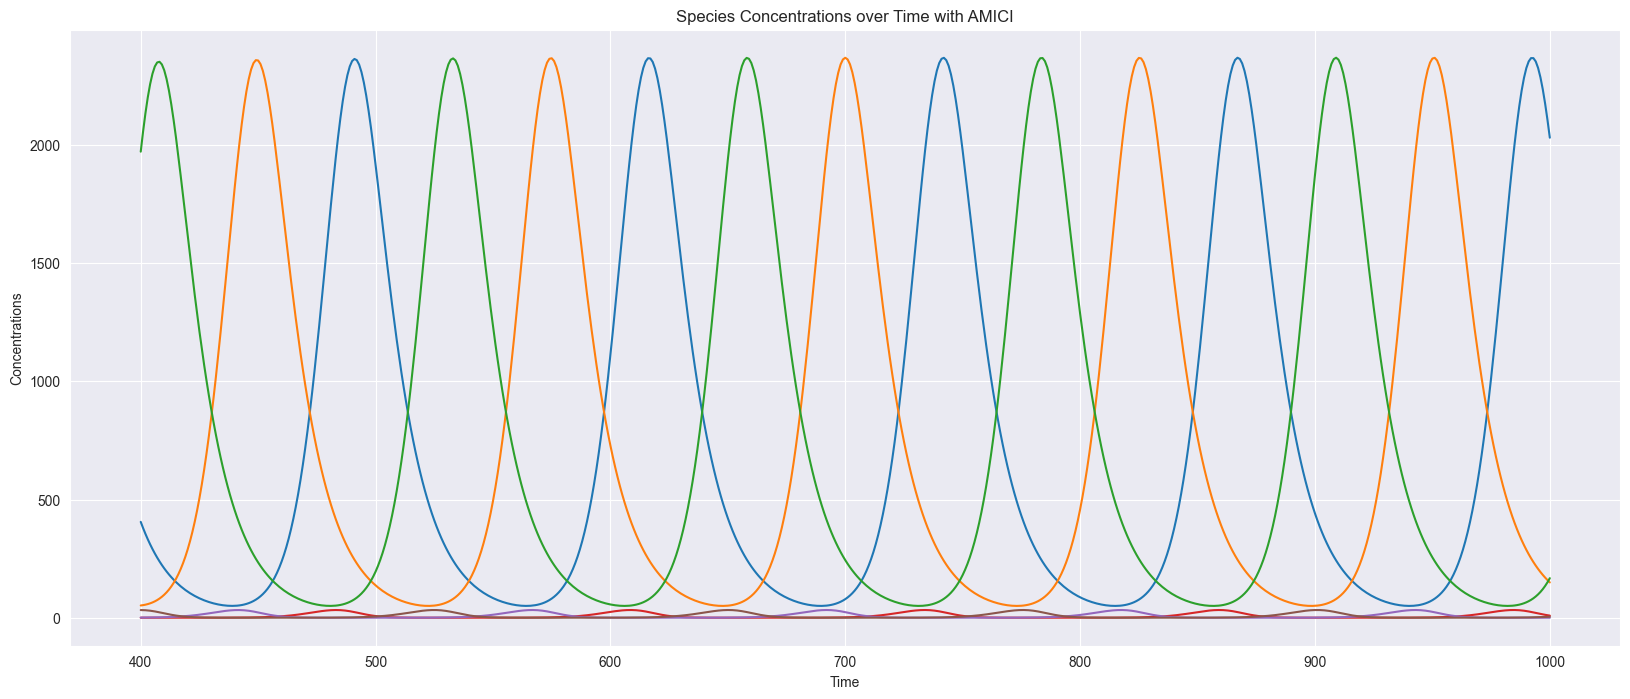

In [24]:
amici_instance.plot_results()